Load the libraries and external packages

In [1]:
import os
import sys

root_path = os.path.dirname(os.getcwd())
sys.path.insert(0, root_path) 

from utils import download

## Download the geotiff files

Let's start by downloading Cloud Optimized GeoTIFF (COG).

In [2]:
path_csv_file = os.path.join(root_path, 'data', 'urls.csv')
list_of_urls = download.get_list_of_urls_in_csv(path_csv_file)
path_folder_tiff_files = os.path.join(root_path, 'data', 'input_tiff_files')
download.download_files(list_of_urls, path_folder_tiff_files)


## Get the metadata of the downaloded geotiff file

Here, we retrieve certain characteristics of the GeoTIFF files, such as the bounding box, resolution, etc. This information will be useful in creating a reference for the Zarr file.

In [3]:
from utils.io import create_list_geotiff_in_folder

list_geotif_files = create_list_geotiff_in_folder(path_folder_tiff_files)
print("List of files : ",list_geotif_files)
nbr_file = len(list_geotif_files)
print("Number of files : ",nbr_file)


List of files :  ['c:\\projects\\zarr_geospatial_playground\\zarr_geospatial_playground\\data\\input_tiff_files\\swisssurface3d-raster_2019_2547-1147_0.5_2056_5728.tif', 'c:\\projects\\zarr_geospatial_playground\\zarr_geospatial_playground\\data\\input_tiff_files\\swisssurface3d-raster_2019_2547-1148_0.5_2056_5728.tif', 'c:\\projects\\zarr_geospatial_playground\\zarr_geospatial_playground\\data\\input_tiff_files\\swisssurface3d-raster_2019_2547-1149_0.5_2056_5728.tif', 'c:\\projects\\zarr_geospatial_playground\\zarr_geospatial_playground\\data\\input_tiff_files\\swisssurface3d-raster_2019_2547-1150_0.5_2056_5728.tif', 'c:\\projects\\zarr_geospatial_playground\\zarr_geospatial_playground\\data\\input_tiff_files\\swisssurface3d-raster_2019_2547-1151_0.5_2056_5728.tif', 'c:\\projects\\zarr_geospatial_playground\\zarr_geospatial_playground\\data\\input_tiff_files\\swisssurface3d-raster_2019_2547-1152_0.5_2056_5728.tif', 'c:\\projects\\zarr_geospatial_playground\\zarr_geospatial_playground\

In [4]:

from metadatas import get_geotiffs_geometadata

metadata = get_geotiffs_geometadata(list_geotif_files)
print("Metadata : ",metadata)


Metadata :  {'max_x': 2557000.0, 'min_x': 2547000.0, 'max_y': 1156000.0, 'min_y': 1147000.0, 'x_size': 0.5, 'y_size': 0.5, 'width': 1000.0, 'height': 1000.0}


## Zarr file creation

Now we create zarr file by merging all geotiff together

In [5]:
from tiffs_2_zarr import geotiffs_to_zarr

zarr_file_path = os.path.join(root_path, 'data', 'output.zarr')

geotiffs_to_zarr(list_geotif_files, zarr_file_path, geotiffs_metadata=metadata)


Image name : swisssurface3d-raster_2019_2547-1147_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1148_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1149_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1150_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1151_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1152_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1153_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1154_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2547-1155_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2548-1147_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2548-1148_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2548-1149_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2548-1150_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2548-1151_0.5_2056_5728.tif
Image name : swisssurface3d-raster_2019_2548-115

## Tiff file creation

The ojcetif now is to create one tiff file from the multiple geotiff files. This will be used to compare the zarr file with the original geotiff files.

In [6]:
from tiffs_merging import multiple_tiff_to_one
tiff_file_path = os.path.join(root_path, 'data', 'output.tif')
multiple_tiff_to_one(list_geotif_files, tiff_file_path)

# Size comparaison 

Let's see the difference between the zarr and geotiff file

In [7]:
import shutil
from pathlib import Path


tif_size = os.path.getsize(tiff_file_path)  / (1024*1024*1024)
print(f"Size of tiff file : {tif_size} Go")

zarr_size = sum(file.stat().st_size for file in Path(zarr_file_path).rglob('*')) / (1024*1024*1024)
print(f"Size of zarr file : {zarr_size} Go")

Size of tiff file : 1.3412389643490314 Go
Size of zarr file : 0.7110218284651637 Go


## Display zarr and tiff files

It's time now to load the zarr and tiff files and display them. For that we will use a bounding box to assess the retrieval time.

3674 5560 14410 15706


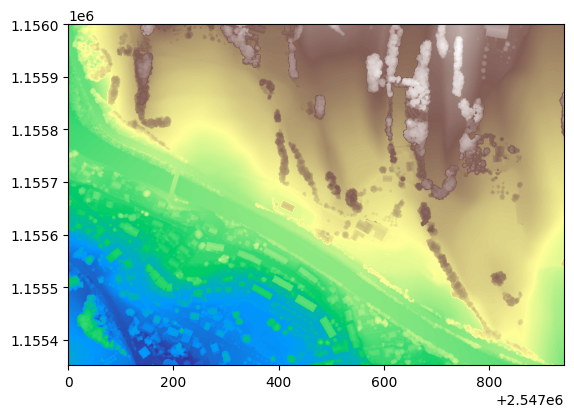

--- 0.26 seconds ---
c:\projects\zarr_geospatial_playground\zarr_geospatial_playground\data\output.tif


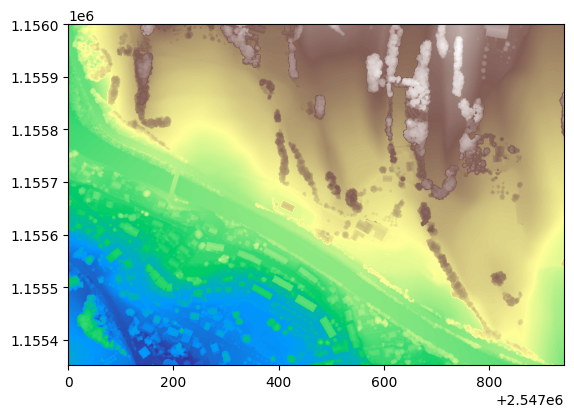

--- 0.3 seconds ---


In [12]:
from display import  read_zarr,read_geotiff
import time 
bbox = (2548837,1148147,2549780,1148795)

start_time_zarr = time.time()
read_zarr(zarr_file_path,bbox=bbox)
print("--- %s seconds ---" % (round(time.time() - start_time_zarr,2)))
start_time_tiff = time.time()
read_geotiff(tiff_file_path,bbox=bbox)
print("--- %s seconds ---" % (round(time.time() - start_time_tiff,2)))
